## The Project

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry.
Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

# The Deliverables

There are three required deliverables for this project:

1. A well documented **Jupyter Notebook** containing any code you've written for this project and comments explaining it.
1. An organized **README.md** file in the GitHub repository that describes the contents of the repository. This file should be the source of information for navigating through the repository.
1. A Github repository containing all of the above files and any additional files worth includding
1. [OPTIONAL] A short **slide deck** (delivered as a PDF export) giving a high-level overview of your methodology and recommendations for non-technical stakeholders. If you do this, make sure to also add and commit this pdf of your non-technical presentation to your repository with a file name of presentation.pdf.

### Jupyter Notebook Must-Haves

For this project, your Jupyter Notebook should meet the following specifications:

#### Organization/Code Cleanliness

* The notebook should be well organized, easy to follow,  and code should be commented where appropriate.  
    * Level Up: The notebook contains well-formatted, professional looking markdown cells explaining any substantial code.  All functions have [docstrings](https://numpydoc.readthedocs.io/en/latest/format.html) that act as professional-quality documentation
* The notebook is written for technical audiences with a way to both understand your approach and reproduce your results. The target audience for this deliverable is other data scientists looking to validate your findings.

#### Visualizations & EDA

* Your project contains at least 4 meaningful data visualizations, with corresponding interpretations. All visualizations are well labeled with axes labels, a title, and a legend (when appropriate)  
* You pose at least 3 meaningful questions and answer them through EDA.  These questions should be well labeled and easy to identify inside the notebook.
    * **Level Up**: Each question is clearly answered with a visualization that makes the answer easy to understand.   
* Your notebook should contain 1 - 2 paragraphs briefly explaining your approach to this project.

### Schedule
- Wednesday, 6/17: Project kickoff
- Thursday 6/18: Coach check-ins
- Friday 6/19: Optional lead check-ins
- Monday 6/22 morning: Presentations

## Grading Rubric

This rubric is garbage, but if you'd like something to reference, use the top half of  [this](https://github.com/learn-co-curriculum/dsc-mod-1-project-v2-1/blob/master/module1_project_rubric.pdf).  Reminder: this is not actually being graded.

## Summary

The end of module projects are a critical part of the program. They give you a chance to both bring together all the skills you've learned into realistic projects.

The projects are serious and important. They are not graded, but feedback will be given. Take the project seriously, put the time in, ask for help from your peers or instructors early and often if you need it, and treat the review as a job interview and you'll do great. We're rooting for you to succeed and we're only going to ask you to take a review again if we believe that you need to. We'll also provide open and honest feedback so you can improve as quickly and efficiently as possible.

Questions:
1. 

In [136]:
#import libraries and create connection
import pandas as pd
import mysql.connector
con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')

In [45]:
#template to read tables
df_budget = pd.read_sql_query("""
SELECT *
FROM movies.tn_movie_budgets""", con)

In [46]:
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [47]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [10]:
def remove_dollar(value):
    return value.replace(',', '').replace('$', '') 

In [ ]:
df_budget['production_budget'] = df_budget['production_budget'].map(remove_dollar).astype(int).map(lambda x: round(x / 1000000))
df_budget['domestic_gross'] = df_budget['domestic_gross'].map(remove_dollar).astype(int).map(lambda x: round(x / 1000000))

In [ ]:
df_budget.head()

In [11]:
def million(number):
    number_int = int(number)
    return round(number_int / 1000000)

In [ ]:
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].map(remove_dollar).map(million)

In [ ]:
df_budget_renamed = df_budget.rename(columns={'production_budget':'production_budget_millions', 'domestic_gross': 'domestic_gross_millions', 'worldwide_gross': 'worldwide_gross_millions'})

In [ ]:
df_budget_renamed

In [ ]:
df_budget_renamed.info()

In [ ]:
df_budget_renamed['total_revenue'] = df_budget_renamed['domestic_gross_millions'] + df_budget_renamed['worldwide_gross_millions']
df_budget_renamed

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

sns.scatterplot(data=df_budget_renamed, x='production_budget_millions', y='total_revenue')

In [127]:
# creating similar graph based on the genre of movie
df_budget_genre = pd.read_sql_query("""
SELECT *
FROM movies.tn_movie_budgets
JOIN movies.imdb_title_basics
ON movies.tn_movie_budgets.movie = movies.imdb_title_basics.primary_title
""", con)

In [128]:
df_budget_genre

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...
3897,68,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",tt5936960,Cure,Cure,2014,NaN,
3898,70,"Apr 1, 1996",Bang,"$10,000",$527,$527,tt6616538,Bang,Bang,2015,NaN,
3899,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3900,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [5]:
df_budget_genre.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


In [6]:
# we have lost a thousand rows by inner join by the name of the movie
df_budget_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3902 entries, 0 to 3901
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3902 non-null   int64  
 1   release_date       3902 non-null   object 
 2   movie              3902 non-null   object 
 3   production_budget  3902 non-null   object 
 4   domestic_gross     3902 non-null   object 
 5   worldwide_gross    3902 non-null   object 
 6   tconst             3902 non-null   object 
 7   primary_title      3902 non-null   object 
 8   original_title     3902 non-null   object 
 9   start_year         3902 non-null   int64  
 10  runtime_minutes    3404 non-null   float64
 11  genres             3902 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 365.9+ KB


In [34]:
df_budget_genre.genres.value_counts().head(11)

Drama                         512
Documentary                   295
Comedy                        144
Comedy,Drama                  106
Horror                         95
Drama,Romance                  91
Comedy,Drama,Romance           86
Thriller                       83
Adventure,Animation,Comedy     75
                               73
Drama,Thriller                 63
Name: genres, dtype: int64

#Top 10 genre
Drama                         512
Documentary                   295
Comedy                        144
Comedy,Drama                  106
Horror                         95
Drama,Romance                  91
Comedy,Drama,Romance           86
Thriller                       83
Adventure,Animation,Comedy     75

In [35]:
topten_genre = ['Drama', 'Documentary', 'Comedy', 'Comedy,Drama', 'Horror', 'Drama,Romance', 'Comedy,Drama,Romance', 'Thriller', 'Adventure,Animation,Comedy', 'Drama,Thriller']


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

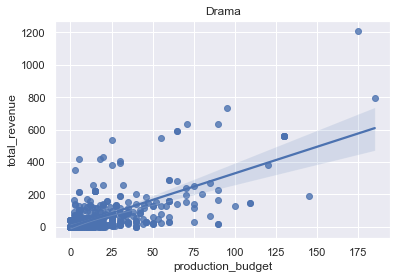

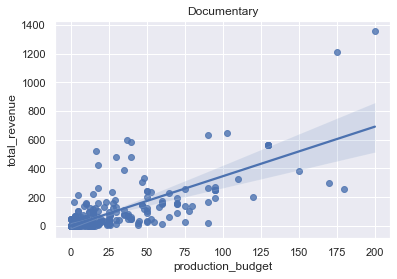

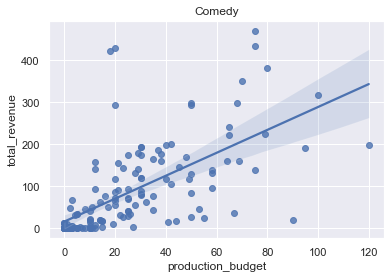

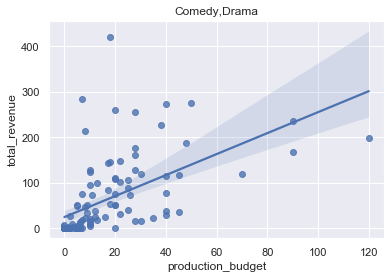

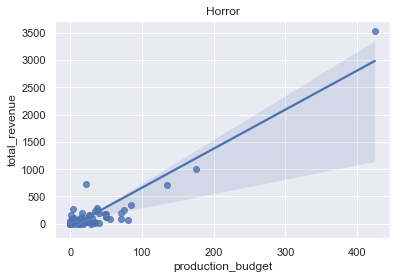

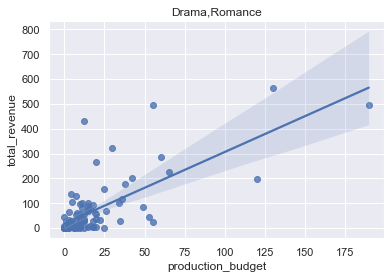

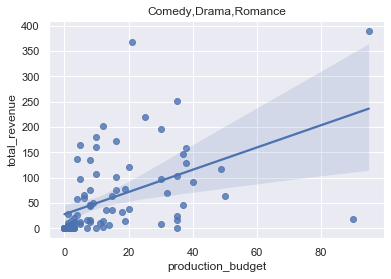

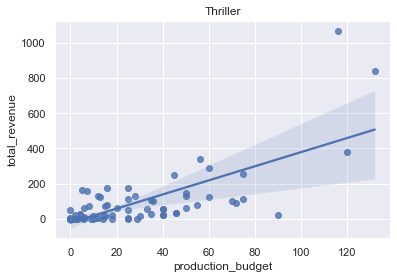

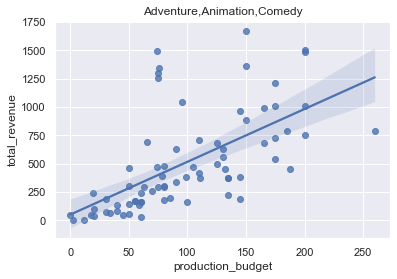

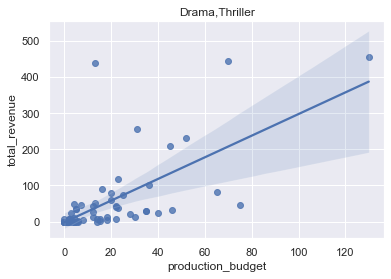

In [42]:
#working
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

for genre in topten_genre:
    # filter by genre
    df_budget_genre_analysis2 = df_budget_genre.loc[df_budget_genre['genres'] == genre]

    # change type to int and change unit to $MM
    df_budget_genre_analysis2['production_budget'] = df_budget_genre_analysis2['production_budget'].map(remove_dollar).astype(int).map(lambda x: round(x / 1000000))
    df_budget_genre_analysis2['domestic_gross'] = df_budget_genre_analysis2['domestic_gross'].map(remove_dollar).astype(int).map(lambda x: round(x / 1000000))
    df_budget_genre_analysis2['worldwide_gross'] = df_budget_genre_analysis2['worldwide_gross'].map(remove_dollar).map(million)
    df_budget_genre_analysis2['total_revenue'] = df_budget_genre_analysis2['domestic_gross'] + df_budget_genre_analysis2['worldwide_gross']
    
    plt.figure()
    plt.title(genre)
    sns.regplot(data=df_budget_genre_analysis2, x='production_budget', y='total_revenue')


In [ ]:
# 2nd analysis: is there a correlation between rating website? if not, which is more correalted with sales

In [115]:
df2 = pd.read_sql_query("""
SELECT *
FROM rt_movie_info
""", con)

OperationalError: MySQL Connection not available.

In [60]:
df2.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",,,104 minutes,None
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",,,116 minutes,None
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",,,128 minutes,None
4,7,,NR,Drama|Romance,Rodney Bennett,Giles Cooper,,,,,200 minutes,None


In [117]:
def minutes_conversion(value):
    number, unit = value.split(' ')
    number = int(number)
    return number

In [118]:
df2['runtime'] = df2['runtime'].map(minutes_conversion)

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
# runtime vs sales, 一定以上のROIを上げている映画とそれ以外の映画でRuntimeに違いはあるか。

In [139]:
# creating similar graph based on the genre of movie
df_budget_genre_rating = pd.read_sql_query("""
SELECT *
FROM movies.tn_movie_budgets
JOIN movies.imdb_title_basics
ON movies.tn_movie_budgets.movie = movies.imdb_title_basics.primary_title
JOIN movies.imdb_title_ratings
USING(tconst)
ORDER BY movies.imdb_title_ratings.averagerating DESC
""", con)

In [141]:
df_budget_genre_rating.head(10)

,tconst,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt8106586,86,"Jun 23, 2015",Crossroads,"$500,000",$0,$0,Crossroads,Crossroads,2018,NaN,Documentary,9.3,22
1,tt8106586,67,"Feb 15, 2002",Crossroads,"$12,000,000","$37,188,667","$57,000,000",Crossroads,Crossroads,2018,NaN,Documentary,9.3,22
2,tt1455256,29,"May 12, 2017",The Wall,"$3,000,000","$1,803,064","$4,495,262",The Wall,The Wall,2010,78.0,Documentary,9.2,8
3,tt6168914,57,"Mar 19, 2010",The Runaways,"$9,500,000","$3,573,673","$5,278,632",The Runaways,The Runaways,2019,108.0,Adventure,9.2,47
4,tt4061640,16,"Dec 27, 2000",Traffic,"$48,000,000","$124,107,476","$208,300,000",Traffic,Traffic,2014,110.0,Documentary,9.2,64
5,tt8680254,65,"Dec 29, 1995",Richard III,"$9,200,000","$2,684,904","$4,199,334",Richard III,Richard III,2016,NaN,Drama,9.1,28
6,tt1795369,3,"Nov 4, 1994",Frankenstein,"$45,000,000","$22,006,296","$112,006,296",Frankenstein,National Theatre Live: Frankenstein,2011,130.0,Drama,9.0,1832
7,tt3060772,28,"Feb 22, 2002",Dragonfly,"$60,000,000","$30,063,805","$30,063,805",Dragonfly,Dragonfly,2013,75.0,"Action,Adventure,Sci-Fi",9.0,5
8,tt2215463,11,"May 29, 2015",Survivor,"$20,000,000",$0,"$1,703,281",Survivor,Survivor,2012,81.0,"Biography,Crime,Documentary",9.0,45
9,tt2316649,95,"Apr 12, 2002",Frailty,"$11,000,000","$13,110,448","$19,947,280",Frailty,Frailty,2012,NaN,Drama,9.0,13


In [145]:
df_budget_genre_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2943 non-null   object 
 1   id                 2943 non-null   int64  
 2   release_date       2943 non-null   object 
 3   movie              2943 non-null   object 
 4   production_budget  2943 non-null   object 
 5   domestic_gross     2943 non-null   object 
 6   worldwide_gross    2943 non-null   object 
 7   primary_title      2943 non-null   object 
 8   original_title     2943 non-null   object 
 9   start_year         2943 non-null   int64  
 10  runtime_minutes    2822 non-null   float64
 11  genres             2943 non-null   object 
 12  averagerating      2943 non-null   float64
 13  numvotes           2943 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 322.0+ KB


In [143]:
df_budget_genre_rating.describe()

,id,start_year,runtime_minutes,averagerating,numvotes
count,2943.000000,2943.000000,2822.000000,2943.000000,2.943000e+03
mean,51.018349,2013.930683,102.963855,6.250085,6.611289e+04
std,28.655002,2.558351,20.734837,1.183322,1.335039e+05
min,1.000000,2010.000000,3.000000,1.600000,5.000000e+00
25%,27.000000,2012.000000,90.000000,5.600000,1.440000e+02
50%,51.000000,2014.000000,101.000000,6.400000,7.999000e+03
75%,76.000000,2016.000000,113.000000,7.100000,7.497850e+04
max,100.000000,2019.000000,280.000000,9.300000,1.841066e+06


In [146]:
df_budget_genre_rating = df_budget_genre_rating[df_budget_genre_rating['numvotes']>=8000]

In [147]:
df_budget_genre_rating.head()

,tconst,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
17,tt1375666,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642",Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
33,tt0816692,32,"Nov 5, 2014",Interstellar,"$165,000,000","$188,017,894","$666,379,375",Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
40,tt4154756,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
43,tt0770802,18,"Aug 24, 2012",Samsara,"$4,000,000","$2,672,413","$5,966,671",Samsara,Samsara,2011,102.0,"Documentary,Music",8.5,29725
45,tt2582802,43,"Oct 10, 2014",Whiplash,"$3,300,000","$13,092,006","$38,969,037",Whiplash,Whiplash,2014,106.0,"Drama,Music",8.5,616916


In [148]:
df_budget_genre_rating['production_budget'] = df_budget_genre_rating['production_budget'].map(remove_dollar).astype(int).map(lambda x: round(x / 1000000))
df_budget_genre_rating['domestic_gross'] = df_budget_genre_rating['domestic_gross'].map(remove_dollar).astype(int).map(lambda x: round(x / 1000000))
df_budget_genre_rating['worldwide_gross'] = df_budget_genre_rating['worldwide_gross'].map(remove_dollar).map(million)
df_budget_genre_rating['total_revenue'] = df_budget_genre_rating['domestic_gross'] + df_budget_genre_rating['worldwide_gross']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [149]:
df_budget_genre_rating.head()

,tconst,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,total_revenue
17,tt1375666,38,"Jul 16, 2010",Inception,160,293,836,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1129
33,tt0816692,32,"Nov 5, 2014",Interstellar,165,188,666,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,854
40,tt4154756,7,"Apr 27, 2018",Avengers: Infinity War,300,679,2048,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,2727
43,tt0770802,18,"Aug 24, 2012",Samsara,4,3,6,Samsara,Samsara,2011,102.0,"Documentary,Music",8.5,29725,9
45,tt2582802,43,"Oct 10, 2014",Whiplash,3,13,39,Whiplash,Whiplash,2014,106.0,"Drama,Music",8.5,616916,52


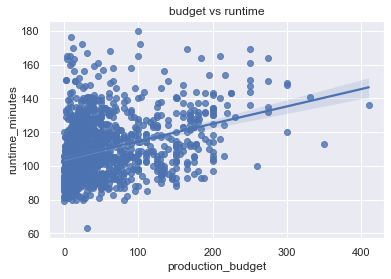

In [152]:
# budget vs runtime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

plt.title('budget vs runtime')
sns.regplot(data=df_budget_genre_rating, x='production_budget', y='runtime_minutes')

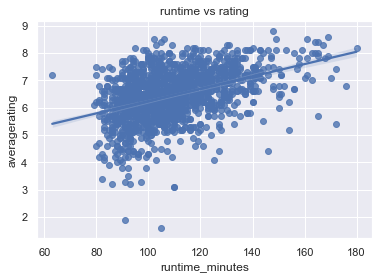

In [153]:
# runtime vs rating
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

plt.title('runtime vs rating')
sns.regplot(data=df_budget_genre_rating, x='runtime_minutes', y='averagerating')

In [154]:
df_budget_genre_rating.genres.unique()

array(['Action,Adventure,Sci-Fi', 'Adventure,Drama,Sci-Fi',
       'Documentary,Music', 'Drama,Music', 'Action,Biography,Drama',
       'Drama,Western', 'Action,Thriller', 'Adventure,Animation,Comedy',
       'Action,Drama', 'Biography,Comedy,Drama', 'Crime,Documentary',
       'Drama,Mystery,War', 'Biography,Crime,Drama', 'Crime,Drama',
       'Drama,Sport', 'Drama,Thriller', 'Biography,Drama,History',
       'Action,Adventure,Comedy', 'Adventure,Comedy,Crime',
       'Action,Drama,Sci-Fi', 'Drama', 'Mystery,Thriller',
       'Action,Adventure,Animation', 'Crime,Drama,Mystery',
       'Biography,Drama', 'Drama,Mystery,Thriller',
       'Action,Adventure,Biography', 'Biography,Drama,Music',
       'Drama,Romance,Sci-Fi', 'Comedy,Drama,Music',
       'Action,Comedy,Drama', 'Drama,Mystery,Sci-Fi', 'Drama,Family',
       'Biography,Drama,Thriller', 'Crime,Drama,Thriller',
       'Documentary,Sport,Thriller', 'Adventure,Comedy,Drama',
       'Action,Drama,History', 'Action,Sci-Fi', 'Comedy